In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Data generation**

In [ ]:
# همیشه ایپاک آخر کمترین تابع هزینه رو نداره و ممکنه ایپاک های قبلی بهتر عمل کرده باشن
# Use recall to choose the best epoch instead of the last one | این مشکل رو با ریکال حل میکنیم

x = np.arange(-80, 81, 0.5)
y = x ** 2 + 5 * x + 3

y.shape

(322,)

In [ ]:
# Spliting train and test data | جدا کردن مقادیر ترین و تست

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape

((257,), (65,))

**Model definition**

In [ ]:
# Define the model | ساخت مدل

model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation='relu', input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=1))

c:\Users\Abolfazl\Desktop\Cumputer\programing\machine_learning\AI-Learning-Journey\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model | کامپایل کردن

# learning_rate=0.0001 -> نشون میده که وزن‌ های مدل با گام‌های خیلی کوچیک تغییر کنن تا مدل پایدارتر یاد بگیره
# اگر این مقدار خیلی بزرگ باشه مدل ممکنه نوسان کنه و خوب یاد نگیره و اگر خیلی کوچیک باشه، مدل ممکنه خیلی آهسته یاد بگیره
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)

# model_2.compile(optimizer=optimizer, loss=loss, metrics=metric)
model_2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# Callback

# monitor='val_loss' -> مقدار تابع هزینه رو در هر ایپاک بررسی میکنه. اگر مقدار آن بهبود پیدا نکنه، شمارش توقف زود هنگام شروع میشه
# patience=10 -> اگر به مدت ۱۰ ایپاک متوالی مقدار تابع هزینه بهتر نشه، آموزش متوقف میشه
# restore_best_weights=True -> مدل در آخر ایپاک با کمترین تابع هزینه رو انتخاب میکنه که بهترین وزن هارو دارن نه آخرین ایپاک
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ّFit the model | فیت کردن
hist = model_2.fit(x_train, y_train, epochs=1000, batch_size=128, callbacks=[early_stop], validation_data=(x_test, y_test))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - loss: 8207433.0000 - mse: 8207433.0000 - val_loss: 8091699.5000 - val_mse: 8091699.5000
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 8445963.0000 - mse: 8445963.0000 - val_loss: 8082715.0000 - val_mse: 8082715.0000
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8608373.0000 - mse: 8608373.0000 - val_loss: 8070872.0000 - val_mse: 8070872.0000
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8298263.5000 - mse: 8298263.5000 - val_loss: 8058677.5000 - val_mse: 8058677.5000
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 8493470.0000 - mse: 8493470.0000 - val_loss: 8053904.0000 - val_mse: 8053904.0000
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 8251746.0000 - mse: 8251746.0000 - val_loss: 8045744.0000 - val_mse: 8045744.0000
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 8640480.0000 - mse: 8640480.0000 - val_loss: 8039816.5000 - val_mse: 8039816.5000
Epoch 8/

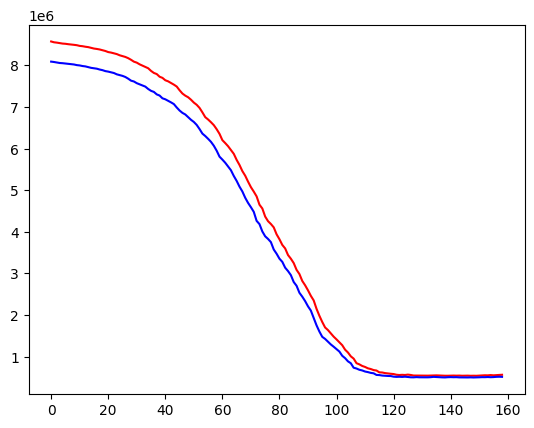

In [ ]:
# Plot the histioty of test data prediction | نمایش تاریخچه تابع هزینه

plt.plot(hist.history['loss'], color='red') # داده ترین
plt.plot(hist.history['val_loss'], color='blue') # داده تست
plt.show()